In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
LSP_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\LSP_times.csv')
LSP_data = LSP_data.drop(columns=['Unnamed: 0'])
obs_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\observed_times.csv')
obs_data = obs_data.drop(columns=['Unnamed: 0'])
obs_data = obs_data.rename(columns={'Stations_id':'Stations_Id', 'Referenzjahr': 'year'})

In [16]:
comparison_data = pd.merge(LSP_data, obs_data, on=['Stations_Id', 'year'], how='outer')

In [39]:
comparison_data['LSP flowering'] = (pd.to_datetime(comparison_data['maxday']) - pd.to_datetime(comparison_data['emergence date'])).dt.days

In [38]:
comparison_data['LSP flowering'].dt.days

0       118.0
1        94.0
2        18.0
3       193.0
4       151.0
        ...  
4550      NaN
4551      NaN
4552      NaN
4553      NaN
4554      NaN
Name: LSP flowering, Length: 4555, dtype: float64

In [13]:
LSP_data['emergence date']

KeyError: 'emergence date'

In [6]:
comparison_data['obs flowering'] = pd.to_datetime(comparison_data['emergence date']) + pd.to_timedelta(comparison_data['observed time emergence to beginning of flowering'], unit='D')
comparison_data['obs yellow ripeness'] = pd.to_datetime(comparison_data['emergence date']) + pd.to_timedelta(comparison_data['observed time emergence to yellow ripeness'], unit='D')

In [7]:
comparison_data

,year,Stations_Id,mingrad,maxgrad,minday,maxday,emergence date,observed time emergence to beginning of flowering,observed time emergence to yellow ripeness,lat,lon,obs flowering,obs yellow ripeness
0,2017.0,7521.0,2017-11-04,2017-07-19,2017-06-17,2017-09-05,2017-05-10,NaN,NaN,NaN,NaN,NaT,NaT
1,2018.0,7521.0,2018-04-08,2018-04-20,2018-05-10,2018-08-18,2018-05-16,63.0,108.0,54.4333,9.8167,2018-07-18,2018-09-01
2,2019.0,7521.0,2019-05-22,2019-04-24,2019-04-16,2019-05-18,2019-04-30,89.0,147.0,54.4333,9.8167,2019-07-28,2019-09-24
3,2020.0,7521.0,2020-09-01,2020-03-25,2020-07-27,2020-11-08,2020-04-29,91.0,166.0,54.4333,9.8167,2020-07-29,2020-10-12
4,2021.0,7521.0,2021-08-29,2021-11-05,2021-06-10,2021-10-08,2021-05-10,81.0,141.0,54.4333,9.8167,2021-07-30,2021-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,2017.0,19914.0,NaN,NaN,NaN,NaN,2017-05-15,57.0,NaN,50.3168,9.3627,2017-07-11,NaT
4551,2018.0,19914.0,NaN,NaN,NaN,NaN,2018-05-09,71.0,NaN,50.3168,9.3627,2018-07-19,NaT
4552,2019.0,19914.0,NaN,NaN,NaN,NaN,2019-05-14,64.0,NaN,50.3168,9.3627,2019-07-17,NaT
4553,2022.0,19914.0,NaN,NaN,NaN,NaN,2022-05-16,57.0,NaN,50.3168,9.3627,2022-07-12,NaT


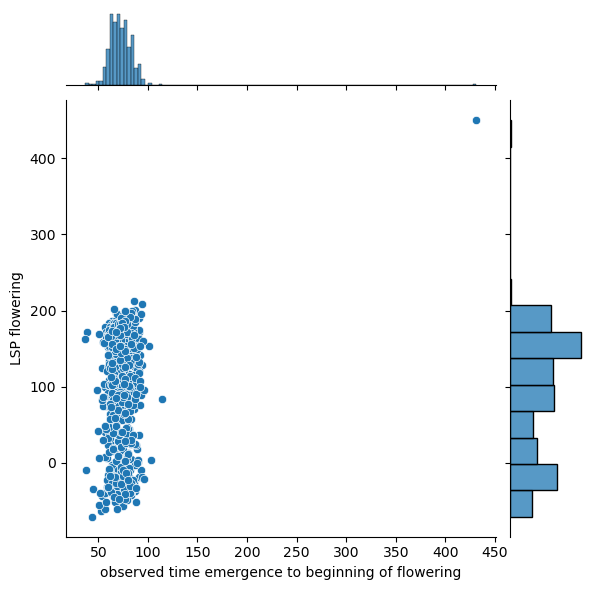

In [40]:
sns.jointplot(x='observed time emergence to beginning of flowering',y='LSP flowering', data=comparison_data.dropna())

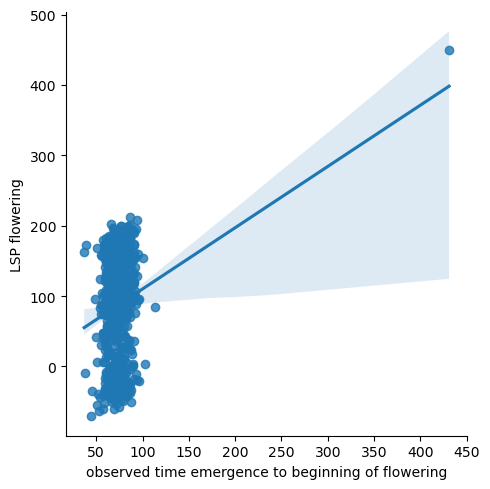

In [41]:
sns.lmplot(x='observed time emergence to beginning of flowering',y='LSP flowering', data=comparison_data.dropna())

In [27]:
comparison_data['LSP flowering']

0         10195200000000000
1          8121600000000000
2          1555200000000000
3         16675200000000000
4         13046400000000000
               ...         
4550   -9223372036854775808
4551   -9223372036854775808
4552   -9223372036854775808
4553   -9223372036854775808
4554   -9223372036854775808
Name: LSP flowering, Length: 4555, dtype: int64

In [22]:
comparison_data.dropna()

,year,Stations_Id,mingrad,maxgrad,minday,maxday,emergence date,observed time emergence to beginning of flowering,observed time emergence to yellow ripeness,lat,lon,LSP flowering
1,2018.0,7521.0,2018-04-08,2018-04-20,2018-05-10,2018-08-18,2018-05-16,63.0,108.0,54.4333,9.8167,94 days
2,2019.0,7521.0,2019-05-22,2019-04-24,2019-04-16,2019-05-18,2019-04-30,89.0,147.0,54.4333,9.8167,18 days
3,2020.0,7521.0,2020-09-01,2020-03-25,2020-07-27,2020-11-08,2020-04-29,91.0,166.0,54.4333,9.8167,193 days
4,2021.0,7521.0,2021-08-29,2021-11-05,2021-06-10,2021-10-08,2021-05-10,81.0,141.0,54.4333,9.8167,151 days
6,2017.0,7532.0,2017-06-18,2017-04-03,2017-06-22,2017-04-27,2017-05-14,80.0,134.0,54.4000,8.7667,-17 days
...,...,...,...,...,...,...,...,...,...,...,...,...
4484,2020.0,19554.0,2020-10-27,2020-11-12,2020-07-27,2020-10-15,2020-05-08,95.0,115.0,53.3222,11.9321,160 days
4485,2021.0,19554.0,2021-11-06,2021-06-19,2021-09-03,2021-05-18,2021-05-16,77.0,95.0,53.3222,11.9321,2 days
4487,2017.0,19555.0,2017-10-29,2017-06-11,2017-10-29,2017-08-10,2017-05-15,55.0,112.0,48.5451,13.3532,87 days
4523,2018.0,19700.0,2018-07-16,2018-05-21,2018-05-09,2018-08-13,2018-05-20,68.0,101.0,50.4316,11.9443,85 days
